# Predicting Bulldozer Sale Price (Time Series Regression Problem)

In this notebook, we will try to predict the sale price of a bulldozer at auction using machine learning.

# 1. Problem definition. 
How well can we predict the sale price of a bulldozer at auction based on it's usage, equipment type, and configuration?

# 2. Data 
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

- Train.csv is the training set, which contains data through the end of 2011.
- Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

# 3. Evaluation
The evaluation metric for this is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. Likewise, our goal for this project will be to build a machine learning model which minimises RMSLE.

# 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [15]:
from sklearn.metrics import mean_squared_log_error

In [16]:
def evaluate(fitted_model, X_test, y_test):
    '''
    Computes the Root Mean Squared Log Error of the model.
    '''
    y_pred = fitted_model.predict(X_test)
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

In [32]:
# Import the data. Since this is a time series, we will parse the dates
df = pd.read_csv('./data/TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


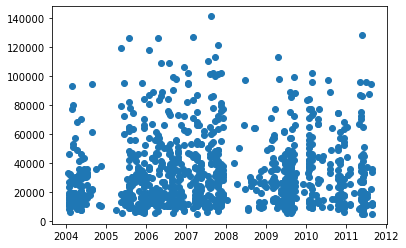

In [4]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000])

## Sort DataFrame
When working with Time Series data, it's best to sort them by date.

In [5]:
df.sort_values(by=['saledate'], inplace=True, ascending=True)
df['saledate'].tail()

410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, dtype: datetime64[ns]

## Make a copy of the dataframe
This is so that alterations can be done while still having the original.

In [6]:
df_tmp = df.copy()
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


## Feature engineering
Creating another feature or tweaking existing features.


In [7]:
# Add datetime parameters for saledate column
df_tmp['saleyear'] = df_tmp.saledate.dt.year
df_tmp['salemonth'] = df_tmp.saledate.dt.month
df_tmp['saleday'] = df_tmp.saledate.dt.day
df_tmp['saledayofweek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saledayofyear'] = df_tmp.saledate.dt.dayofyear

In [8]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [9]:
# We drop the saledate as we have divided it already into many features
df_tmp.drop('saledate', axis=1, inplace=True)

In [10]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

# 5. Modelling
We're gonna do model-driven EDA

In [11]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-nul

### Turn data into numbers

One way is to convert them into pandas' category dtype. This converts them into numbers

In [12]:
# Find columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [14]:
# Convert strings to category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype('category').cat.as_ordered()

df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

In [15]:
# Show numerical representation of category State
df_tmp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [16]:
df_tmp.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

In [17]:
# Save preprocessed data
df_tmp.to_csv('./data/TrainValid_tmp.csv', index=False)

In [27]:
# Load saved preprocessed data
df_tmp = pd.read_csv('./data/TrainValid_tmp.csv',
                     low_memory=False)
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31


### Split into training and validation set

In [37]:
df_val = df_tmp[df_tmp.saleyear == 2012]
df_train = df_tmp[df_tmp.saleyear != 2012]

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_val, y_val = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

### Fill *numeric* missing values

In [5]:
# Find numeric columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleyear
salemonth
saleday
saledayofweek
saledayofyear


In [8]:
# Find null values in numeric columns
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [13]:
# Fill missing values with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Adds boolean column that indicates whether or not the data is missing originally
            df_tmp[label+'_is_missing'] = pd.isnull(content)
            # Fills the missing entries with the median
            df_tmp[label].fillna(content.median(), inplace=True)

In [14]:
# Check if there are still numeric missing values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        else:
            print('No numeric missing values.')

No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.
No numeric missing values.


In [15]:
# Check the number of missing entries per column per column before
df_tmp.auctioneerID_is_missing.value_counts()

False    392562
True      20136
Name: auctioneerID_is_missing, dtype: int64

In [17]:
df['auctioneerID'].isna().value_counts()

False    392562
True      20136
Name: auctioneerID, dtype: int64

### Fill *categorical* missing values

In [18]:
# Find categorical columns
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [29]:
# Turn into numbers and fill missing values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn into nos. and add 1 (to fill missing values)
        df_tmp[label] = pd.Categorical(content).codes + 1

In [20]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,TD20,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,A66,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,D7G,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,A62,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,D3B,...,True,True,True,True,True,False,False,False,True,True


In [22]:
df_tmp.isna().sum().sum()

0

### Preprocessing data function

In [22]:
def preprocess_data(df):
    '''
    Accepts a dataframe df.
    Fills missing values and turns categorical data into numbers.
    Returns the dataframe df.
    '''
    # Fill missing values of numerical columns
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Missing values indicator column
                df[label+'_is_missing'] = pd.isnull(content)
                # Fill missing values with median
                df[label].fillna(content.median(), inplace=True)
    
    # Fill missing values of non-numerical columns
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Convert to category type
            df[label] = content.astype('category').cat.as_ordered()
            # Convert category to numbers
            df[label] = pd.Categorical(content).codes + 1
          
    return df

### Split to training and validation set

In [ ]:
# Load saved feature engineered data
df_tmp = pd.read_csv('./data/TrainValid_tmp.csv',
                     low_memory=False)

In [37]:
df_val = df_tmp[df_tmp.saleyear == 2012]
df_train = df_tmp[df_tmp.saleyear != 2012]

X_train, y_train = df_train.drop('SalePrice', axis=1), df_train['SalePrice']
X_val, y_val = df_val.drop('SalePrice', axis=1), df_val['SalePrice']

In [39]:
X_train_preprocessed = preprocess_data(X_train)

In [40]:
X_val_preprocessed = preprocess_data(X_val)

In [41]:
df_train.to_csv('./data/df_train.csv', index=False)
df_val.to_csv('./data/df_val.csv', index=False)

In [43]:
X_train_preprocessed.to_csv('./data/X_train_preprocessed.csv', index=False)
X_val_preprocessed.to_csv('./data/X_val_preprocessed.csv', index=False)

In [4]:
X_train_preprocessed = pd.read_csv('./data/X_train_preprocessed.csv')
X_train_preprocessed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,6,0,0,1989,1,17,1,17,False,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,0,4,2,1989,1,31,1,31,False,True
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,6,0,0,1989,1,31,1,31,False,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,0,4,2,1989,1,31,1,31,False,True
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,5,0,0,1989,1,31,1,31,False,True


In [5]:
X_val_preprocessed = pd.read_csv('./data/X_val_preprocessed.csv')
X_val_preprocessed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,MachineHoursCurrentMeter_is_missing
0,4449186,2318824,26964,173,99.0,1996,0.0,0,2269,711,...,5,6,0,0,2012,1,1,6,1,False
1,1222855,531393,23926,121,3.0,1000,8145.0,2,85,19,...,0,0,0,0,2012,1,4,2,4,False
2,6258613,1810917,13260,149,99.0,2000,24.0,2,1115,328,...,0,0,0,0,2012,1,4,2,4,False
3,6282680,1543404,1830,149,99.0,2004,4373.0,3,64,20,...,0,0,0,0,2012,1,4,2,4,False
4,6282759,1863077,11390,149,99.0,2006,3467.0,3,139,41,...,0,0,0,0,2012,1,4,2,4,False


In [6]:
set(X_train_preprocessed.columns)-set(X_val_preprocessed.columns)

{'auctioneerID_is_missing'}

In [7]:
X_val_preprocessed['auctioneerID_is_missing'] = False
X_val_preprocessed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,MachineHoursCurrentMeter_is_missing,auctioneerID_is_missing
0,4449186,2318824,26964,173,99.0,1996,0.0,0,2269,711,...,6,0,0,2012,1,1,6,1,False,False
1,1222855,531393,23926,121,3.0,1000,8145.0,2,85,19,...,0,0,0,2012,1,4,2,4,False,False
2,6258613,1810917,13260,149,99.0,2000,24.0,2,1115,328,...,0,0,0,2012,1,4,2,4,False,False
3,6282680,1543404,1830,149,99.0,2004,4373.0,3,64,20,...,0,0,0,2012,1,4,2,4,False,False
4,6282759,1863077,11390,149,99.0,2006,3467.0,3,139,41,...,0,0,0,2012,1,4,2,4,False,False


In [10]:
X_val_preprocessed.to_csv('./data/X_val_preprocessed.csv')

In [8]:
df_train = pd.read_csv('./data/df_train.csv')
y_train = df_train['SalePrice']
y_train[:5]

0     9500.0
1    14000.0
2    50000.0
3    16000.0
4    22000.0
Name: SalePrice, dtype: float64

In [9]:
df_val = pd.read_csv('./data/df_val.csv')
y_val = df_val['SalePrice']
y_val[:5]

0    46173.2
1    66000.0
2    26800.0
3    42100.0
4    62100.0
Name: SalePrice, dtype: float64

### Build model

In [28]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=20000)

In [29]:
model.fit(X_train_preprocessed, y_train)

RandomForestRegressor(max_samples=20000, n_jobs=-1, random_state=42)

In [30]:
model.score(X_val_preprocessed, y_val)

0.8495199273330477

### Create Evaluation function
In this problem, RMSLE is the evaluation metric to be used.

In [11]:
from sklearn.metrics import mean_squared_log_error

In [12]:
def evaluate(fitted_model, X_test, y_test):
    '''
    Computes the Root Mean Squared Log Error of the model.
    '''
    y_pred = fitted_model.predict(X_test)
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

In [56]:
evaluate(model, X_val_preprocessed, y_val)

0.2807175263756642

### Hyperparameter Tuning

In [33]:
rf_dist = {
    'n_estimators': np.arange(10, 100, 10),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2, 20, 2),
    'min_samples_leaf': np.arange(1, 20, 2),
    'max_features': [0.5, 1, 'sqrt', 'auto'],
    'max_samples': [10000]
}

In [41]:
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              rf_dist,
                              n_iter=2,
                              cv=5,
                              verbose=True,
                              random_state=42
                             )

In [42]:
rs_model.fit(X_train_preprocessed, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   27.3s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=True)

In [43]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [57]:
evaluate(rs_model, X_val_preprocessed, y_val)

0.4752145869173809

### Train model with best hyperparameters

In [18]:
ideal_model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [19]:
%%time
ideal_model.fit(X_train_preprocessed, y_train)

Wall time: 4min 14s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [20]:
evaluate(ideal_model, X_val_preprocessed, y_val)

0.2535294976548342

In [53]:
from joblib import dump, load

In [54]:
# Save model
dump(ideal_model, './data/ideal_model.joblib')

['./data/ideal_model.joblib']

### Preprocess test data

In [34]:
X_test = pd.read_csv('./data/Test.csv',
                      low_memory=False,
                      parse_dates=['saledate'])
X_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [35]:
# Add datetime parameters for saledate column
X_test['saleyear'] = X_test.saledate.dt.year
X_test['salemonth'] = X_test.saledate.dt.month
X_test['saleday'] = X_test.saledate.dt.day
X_test['saledayofweek'] = X_test.saledate.dt.dayofweek
X_test['saledayofyear'] = X_test.saledate.dt.dayofyear

In [36]:
X_test_preprocessed = preprocess_data(X_test)
X_test_preprocessed.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleyear,salemonth,saleday,saledayofweek,saledayofyear,MachineHoursCurrentMeter_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,3,499,...,0,0,0,0,2012,5,3,3,124,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,9,831,...,0,0,3,2,2012,5,10,3,131,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,9,1177,...,0,0,0,0,2012,5,10,3,131,False
3,1227848,56204,1269,121,3,2006,8940.0,1,9,287,...,0,0,0,0,2012,5,10,3,131,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,9,566,...,4,5,0,0,2012,5,10,3,131,False


In [37]:
set(X_train_preprocessed.columns)-set(X_test_preprocessed.columns)

{'auctioneerID_is_missing'}

In [38]:
X_test_preprocessed['auctioneerID_is_missing'] = False

In [44]:
X_test_preprocessed.drop('saledate', axis=1, inplace=True)

In [56]:
X_test_preprocessed.to_csv('./data/X_test_preprocessed.csv', index=False)

In [46]:
y_test_pred = ideal_model.predict(X_test_preprocessed)

### Format predictions (Kaggle format)

In [50]:
df_test = pd.DataFrame(X_test['SalesID'])
df_test.head()

,SalesID
0,1227829
1,1227844
2,1227847
3,1227848
4,1227863


In [52]:
df_test['SalePrice'] = y_test_pred
df_test.head()

,SalesID,SalePrice
0,1227829,21208.0
1,1227844,18603.5
2,1227847,46565.0
3,1227848,80305.0
4,1227863,54103.0


In [57]:
df_test.to_csv('./data/test_pred.csv', index=False)

### Feature Importance (of RandomForestRegressor)

In [62]:
importances = ideal_model.feature_importances_
importances

array([4.97476443e-02, 1.65388562e-02, 3.25870919e-02, 4.25980506e-04,
       4.48684650e-03, 2.61512980e-01, 3.32350719e-03, 1.21808157e-03,
       2.01555885e-02, 7.82379673e-02, 5.23445131e-02, 4.90481425e-03,
       4.20701476e-03, 2.30240642e-01, 3.95848723e-02, 8.89931339e-03,
       2.46401420e-04, 2.49893014e-04, 1.70321045e-03, 8.75213923e-03,
       4.63069088e-04, 4.08288118e-05, 5.95543909e-04, 1.86783003e-04,
       1.69497142e-03, 3.01530803e-05, 3.42402069e-04, 7.25686183e-03,
       6.15230707e-04, 1.43604978e-03, 4.89705582e-03, 2.74892021e-03,
       2.30697106e-03, 7.35180173e-03, 4.11625536e-04, 2.03798874e-03,
       1.06600012e-03, 2.99448314e-02, 8.46432940e-06, 6.09123201e-06,
       2.02545320e-04, 1.16920333e-03, 1.35303685e-03, 7.86106300e-04,
       2.76009692e-04, 5.01637494e-04, 4.30092103e-04, 1.78135791e-03,
       1.08064006e-03, 2.05290376e-04, 2.67979306e-04, 7.63381146e-02,
       3.38142447e-03, 9.26061110e-03, 4.57200426e-03, 1.47824782e-02,
      

In [70]:
# Plot feature importances

def plot_feature_importance(columns, importances, n=20):
    df = pd.DataFrame({'features': columns, 'feature_importances': importances})
    df.sort_values('feature_importances', ascending=False, inplace=True)
    df.reset_index(drop=True)
    # Plot dataframe
    fig, ax = plt.subplots()
    ax.barh(df['features'][:n], df['feature_importances'][:n])
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature Importances')
    ax.invert_yaxis()
    return

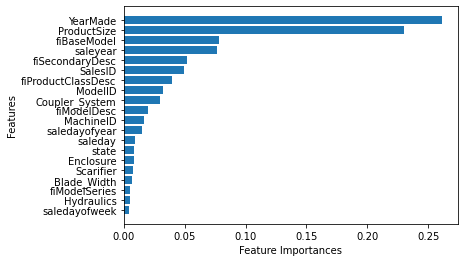

In [72]:
plot_feature_importance(X_train_preprocessed.columns, importances)